In [3]:
import numpy as np
import pandas as pd


In [11]:
df=pd.read_csv("Partially Cleaned Salary Dataset.csv")

In [15]:
df.head(5)

,Unnamed: 0,Company Name,Job Title,Salaries Reported,Location,Salary
0,0,Mu Sigma,Data Scientist,105,Bangalore,648573.0
1,1,IBM,Data Scientist,95,Bangalore,1191950.0
2,2,Tata Consultancy Services,Data Scientist,66,Bangalore,836874.0
3,3,Impact Analytics,Data Scientist,40,Bangalore,669578.0
4,4,Accenture,Data Scientist,32,Bangalore,944110.0


In [21]:
df=df.drop("Unnamed: 0",axis=1)

In [25]:
df.head(3)
df=df.drop("Job Title",axis=1)

In [27]:
df.head(3)

,Company Name,Salaries Reported,Location,Salary
0,Mu Sigma,105,Bangalore,648573.0
1,IBM,95,Bangalore,1191950.0
2,Tata Consultancy Services,66,Bangalore,836874.0


In [29]:
df.isnull().sum()

Company Name         0
Salaries Reported    0
Location             0
Salary               0
dtype: int64

In [31]:
df.describe()

,Salaries Reported,Salary
count,4339.000000,4.339000e+03
mean,2.777138,1.119885e+06
std,5.148095,4.300905e+06
min,1.000000,1.081400e+04
25%,1.000000,4.199380e+05
50%,1.000000,7.062830e+05
75%,3.000000,1.196675e+06
max,105.000000,1.661404e+08


In [37]:
kategorik = [col for col in df.columns if df[col].dtypes == "O"]
numeric = [col for col in df.columns if df[col].dtypes != "O"]
print(f'kategorik: {len(kategorik)}')
print(f'numeric: {len(numeric)}')

kategorik: 2
numeric: 2


In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
def kategorik_toplam(df, col_name, plot=False):
    print(pd.DataFrame({col_name: df[col_name].value_counts(),
                        "Ratio": 100 * df[col_name].value_counts() / len(df)}))

    if plot:
        sns.countplot(x=df[col_name], data=df)
        plt.show(block=True)


for col in kategorik:
    kategorik_toplam(df, col)

                            Company Name     Ratio
Company Name                                      
Tata Consultancy Services             41  0.944918
Amazon                                31  0.714450
Accenture                             30  0.691404
Google                                27  0.622263
IBM                                   26  0.599216
...                                  ...       ...
URS Technologies Solutions             1  0.023047
Aniket Sonawane                        1  0.023047
Brahman bhetun                         1  0.023047
Airavaat Car Rentals                   1  0.023047
Market Pulse Technologies              1  0.023047

[2528 rows x 2 columns]
           Location      Ratio
Location                      
Bangalore      1584  36.506107
Pune            814  18.760083
Hyderabad       669  15.418299
New Delhi       655  15.095644
Mumbai          617  14.219866


count    4339.000000
mean        2.777138
std         5.148095
min         1.000000
5%          1.000000
10%         1.000000
20%         1.000000
30%         1.000000
40%         1.000000
50%         1.000000
60%         2.000000
70%         2.000000
80%         3.000000
90%         5.000000
95%         9.000000
99%        25.000000
max       105.000000
Name: Salaries Reported, dtype: float64


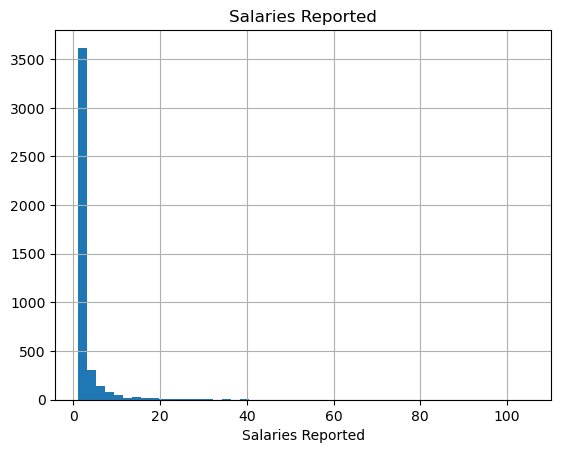

#####################################
count    4.339000e+03
mean     1.119885e+06
std      4.300905e+06
min      1.081400e+04
5%       1.734816e+05
10%      2.460024e+05
20%      3.645500e+05
30%      4.817410e+05
40%      6.010918e+05
50%      7.062830e+05
60%      8.703930e+05
70%      1.049871e+06
80%      1.289859e+06
90%      1.773470e+06
95%      2.266331e+06
99%      5.010108e+06
max      1.661404e+08
Name: Salary, dtype: float64


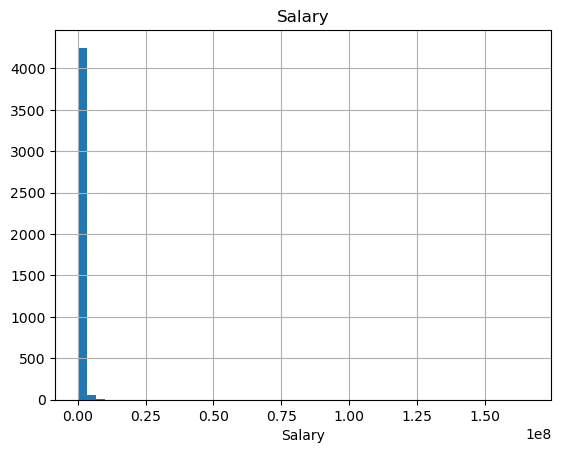

#####################################


In [43]:
def numeric_toplam(df, numeric, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(df[numeric].describe(quantiles).T)

    if plot:
        df[numeric].hist(bins=50)
        plt.xlabel(numeric)
        plt.title(numeric)
        plt.show(block=True)

    print("#####################################")


for col in numeric:
    numeric_toplam(df, col, True)

In [49]:
def hedef_değisken_analizi(df, target, kategorik_kolon):
    print(pd.DataFrame({"TARGET_MEAN": df.groupby(kategorik_kolon)[target].mean()}), end="\n\n\n")


for kolon in kategorik:
    hedef_değisken_analizi(df,"Salary",kolon)

                 TARGET_MEAN
Company Name                
& Other Stories     722247.0
---                 120000.0
159 Solutions       828777.0
1mg                 991426.0
20K Group            32260.0
...                      ...
vPhrase             588844.2
vitrana            1000000.0
wayForward          845183.0
yellow.ai           587282.5
Águas Guariroba     666792.0

[2528 rows x 1 columns]


            TARGET_MEAN
Location               
Bangalore  1.184622e+06
Hyderabad  1.200312e+06
Mumbai     1.018556e+06
New Delhi  8.386296e+05
Pune       1.230932e+06




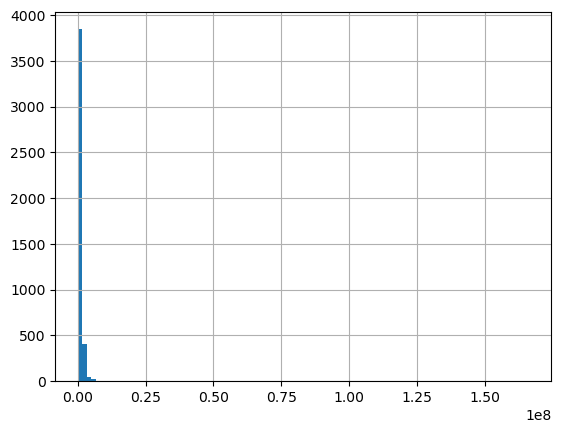

In [51]:
df["Salary"].hist(bins=100)
plt.show(block=True)

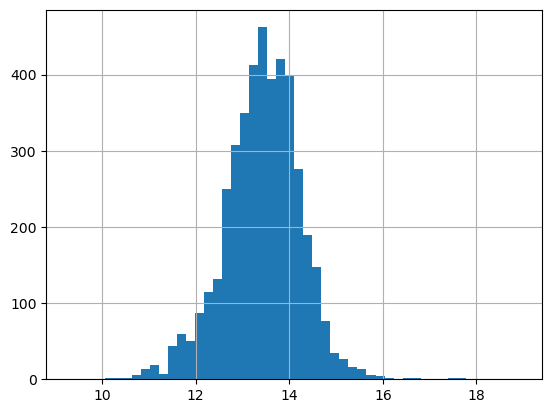

In [53]:
#bağımlı değişkenin logaritmasını alarak normallik varsayıma
np.log1p(df['Salary']).hist(bins=50)
plt.show(block=True)